In [1]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import itertools as it

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

In [2]:
from dicts_paths_v1 import *
from calc_functions_v1 import *
from graph_functions_v1 import *

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

In [11]:
print(today)
print(date_choice)
print(date)
print(date_text)

2021-04-06
2021-04-05
2021-04-05
05/04/2021


### File paths

In [12]:
print('SIDEP\n   Données d\'entrée :') 
print(path_test)
print(fname_temp_test)
print(fname_output_test)

print('Données hospitalières\n   Données d\'entrée :') 
print(path_hosp)
print(fname_temp_hosp)
print(fname_output_hosp)

print('VAC-SI\n   Données d\'entrée :') 
print(path_vac)
print(fname_temp_vac)
print(fname_output_vac)

SIDEP
   Données d'entrée :
['../Data/sp-pos-quot-dep-2021-04-05-19h25.csv']
./Temp/sp-pos-quot-dep-2021-04-05-19h25
../Output/sp-pos-quot-dep-2021-04-05-19h25
Données hospitalières
   Données d'entrée :
['../Data/donnees-hospitalieres-classe-age-covid19-2021-04-05-19h19.csv']
./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-05-19h19
../Output/donnees-hospitalieres-classe-age-covid19-2021-04-05-19h19
VAC-SI
   Données d'entrée :
['../Data/vacsi-a-dep-2021-04-05-19h30.csv']
./Temp/vacsi-a-dep-2021-04-05-19h30
../Output/vacsi-a-dep-2021-04-05-19h30


### Dictionnaries

In [13]:
print('Dict. reg_name\n     "11" :', reg_name['11'])
print('Dict. reg2dep\n     "Corse" :', reg2dep['Corse'])
print('Dict. dep2reg\n     "75" :', dep2reg['75'])
print('Dict. dep_name\n     "67" :', dep_name['67'])
print('Dict. class_2_3C\n      29 : ', class_2_3C[29])
print('Dict reg_3C_pop\n     "Grand Est" :', reg_3C_pop['Grand Est'])
print('Dict reg_2lignes\n      "Auvergne-Rhône-Alpes" :', reg_2lignes["Auvergne-Rhône-Alpes"], sep = '\n')

Dict. reg_name
     "11" : Île-de-France
Dict. reg2dep
     "Corse" : ['2A', '2B']
Dict. dep2reg
     "75" : Île-de-France
Dict. dep_name
     "67" : Bas-Rhin
Dict. class_2_3C
      29 :  0-29
Dict reg_3C_pop
     "Grand Est" : {'0-29': 1874571, '30-59': 2124342, '60+': 1512834, 'whole': 5511747}
Dict reg_2lignes
      "Auvergne-Rhône-Alpes" :
Auvergne-
Rhône-Alpes


### Functions

In [14]:
help(groupby_sum)

Help on function groupby_sum in module calc_functions_v1:

groupby_sum(d, columns)
    d: dataframe
    columns: list of column names
    returns: dataframe is grouped according to columns fed in
            other columns are summed
            dataframe is then formatted into a dataframe



In [15]:
help(columns_first)

Help on function columns_first in module calc_functions_v1:

columns_first(d, columns)
    d: dataframe
    by: a list of column names
    returns: dataframe reordered



In [16]:
help(calc_hebdo)

Help on function calc_hebdo in module calc_functions_v1:

calc_hebdo(d, columns_to_group, columns_to_sum)
    d: a dataframe
    columns_to_group: list of columns from which groups will be formed
            for example ['entity', 'three_class'] -> will calculate hebdo sums for (regionA, class1), (regionA, class2), etc.
    columns_to_sum: list of columns which values will be summed on a week-wise base
            for example ['P', 'T']



# Traitement des données SIDEP

In [17]:
fname = path_test[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,jour,P,T,cl_age90,pop
256770,71,2021-02-04,22,237,89,35767.0
300931,84,2020-07-09,1,96,49,70030.0
207931,58,2020-07-04,0,4,90,4549.0


In [18]:
d = din.copy()
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'cl_age90', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,cl_age90,jour,P,T,pop
128122,35,59,2021-02-09,32,624,135357.0
340297,95,19,2020-07-13,3,180,172460.0
318528,89,19,2020-06-14,0,2,38846.0


In [19]:
d = din.copy()
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'cl_age90'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,cl_age90,jour,P,T,pop
218793,Normandie,39,2020-07-17,0,49,27860.0
196212,Grand Est,59,2021-02-24,41,574,92748.0
253301,Bourgogne-Franche-Comté,49,2021-02-14,2,7,29753.0


In [20]:
d = din.copy()
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'cl_age90'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,cl_age90,jour,P,T,pop
2098,France entière,79,2020-11-19,1142,16148,5.695639e+06
2069,France entière,9,2020-11-17,839,8428,7.763206e+06
2247,France entière,29,2020-12-03,1717,28997,7.476787e+06


In [21]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'cl_age90', 'jour'])
dout.head(3)

,entity,cl_age90,jour,P,T,pop
0,01,9,2020-05-13,0,16,83001.0
1,01,19,2020-05-13,1,17,84665.0
2,01,29,2020-05-13,0,34,65496.0


In [22]:
dout.tail(3)

,entity,cl_age90,jour,P,T,pop
747172,France entière,79,2021-04-02,1867,27514,5.695639e+06
747173,France entière,89,2021-04-02,1033,15357,3.245281e+06
747174,France entière,90,2021-04-02,350,7367,9.125806e+05


In [23]:
fname = fname_temp_test + '-tot.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - 3 classes d'âge

In [16]:
fname = fname_temp_test + '-tot.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.tail(3)

,entity,cl_age90,jour,P,T,pop
747172,France entière,79,2021-04-02,1867,27514,5.695639e+06
747173,France entière,89,2021-04-02,1033,15357,3.245281e+06
747174,France entière,90,2021-04-02,350,7367,9.125806e+05


In [17]:
d = din.copy()
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,P,T,pop
154690,Île-de-France,60+,2021-03-31,1582,15567,2517033.0
154691,Île-de-France,whole,2021-03-31,13626,134632,12278210.0
154692,Île-de-France,0-29,2021-04-01,4923,65869,4792882.0
154693,Île-de-France,30-59,2021-04-01,6190,61540,4968295.0
154694,Île-de-France,60+,2021-04-01,1546,15442,2517033.0
154695,Île-de-France,whole,2021-04-01,12664,142905,12278210.0
154696,Île-de-France,0-29,2021-04-02,4816,69009,4792882.0
154697,Île-de-France,30-59,2021-04-02,5871,66808,4968295.0
154698,Île-de-France,60+,2021-04-02,1418,16171,2517033.0
154699,Île-de-France,whole,2021-04-02,12108,152071,12278210.0


In [18]:
fname = fname_temp_test + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - calculs chiffres hebdomadaires

In [19]:
fname = fname_temp_test + '-tot-3C.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.sample(3)

,entity,three_class,jour,P,T,pop
134752,978,0-29,2020-12-12,2,16,1.545147e+04
32334,26,60+,2021-02-20,24,370,1.506940e+05
77092,59,0-29,2020-08-19,48,1828,1.005422e+06


In [20]:
d = din.copy()

dh = calc_hebdo(d, 
           columns_to_group = ['entity', 'three_class'], 
           columns_to_sum = ['P', 'T'])

0.38 s : (P hebdo, T hebdo) calculated for (01, 0-29)
0.77 s : (P hebdo, T hebdo) calculated for (01, 30-59)
1.15 s : (P hebdo, T hebdo) calculated for (01, 60+)
1.54 s : (P hebdo, T hebdo) calculated for (01, whole)
1.91 s : (P hebdo, T hebdo) calculated for (02, 0-29)
2.30 s : (P hebdo, T hebdo) calculated for (02, 30-59)
2.68 s : (P hebdo, T hebdo) calculated for (02, 60+)
3.09 s : (P hebdo, T hebdo) calculated for (02, whole)
3.46 s : (P hebdo, T hebdo) calculated for (03, 0-29)
3.83 s : (P hebdo, T hebdo) calculated for (03, 30-59)
4.22 s : (P hebdo, T hebdo) calculated for (03, 60+)
4.60 s : (P hebdo, T hebdo) calculated for (03, whole)
4.98 s : (P hebdo, T hebdo) calculated for (04, 0-29)
5.37 s : (P hebdo, T hebdo) calculated for (04, 30-59)
5.77 s : (P hebdo, T hebdo) calculated for (04, 60+)
6.15 s : (P hebdo, T hebdo) calculated for (04, whole)
6.53 s : (P hebdo, T hebdo) calculated for (05, 0-29)
6.91 s : (P hebdo, T hebdo) calculated for (05, 30-59)
7.28 s : (P hebdo, T he

57.20 s : (P hebdo, T hebdo) calculated for (37, 30-59)
57.58 s : (P hebdo, T hebdo) calculated for (37, 60+)
57.97 s : (P hebdo, T hebdo) calculated for (37, whole)
58.35 s : (P hebdo, T hebdo) calculated for (38, 0-29)
58.73 s : (P hebdo, T hebdo) calculated for (38, 30-59)
59.11 s : (P hebdo, T hebdo) calculated for (38, 60+)
59.48 s : (P hebdo, T hebdo) calculated for (38, whole)
59.86 s : (P hebdo, T hebdo) calculated for (39, 0-29)
60.25 s : (P hebdo, T hebdo) calculated for (39, 30-59)
60.62 s : (P hebdo, T hebdo) calculated for (39, 60+)
61.00 s : (P hebdo, T hebdo) calculated for (39, whole)
61.37 s : (P hebdo, T hebdo) calculated for (40, 0-29)
61.74 s : (P hebdo, T hebdo) calculated for (40, 30-59)
62.12 s : (P hebdo, T hebdo) calculated for (40, 60+)
62.49 s : (P hebdo, T hebdo) calculated for (40, whole)
62.87 s : (P hebdo, T hebdo) calculated for (41, 0-29)
63.24 s : (P hebdo, T hebdo) calculated for (41, 30-59)
63.62 s : (P hebdo, T hebdo) calculated for (41, 60+)
64.00 

112.79 s : (P hebdo, T hebdo) calculated for (74, 30-59)
113.16 s : (P hebdo, T hebdo) calculated for (74, 60+)
113.54 s : (P hebdo, T hebdo) calculated for (74, whole)
113.91 s : (P hebdo, T hebdo) calculated for (75, 0-29)
114.28 s : (P hebdo, T hebdo) calculated for (75, 30-59)
114.65 s : (P hebdo, T hebdo) calculated for (75, 60+)
115.02 s : (P hebdo, T hebdo) calculated for (75, whole)
115.39 s : (P hebdo, T hebdo) calculated for (76, 0-29)
115.77 s : (P hebdo, T hebdo) calculated for (76, 30-59)
116.14 s : (P hebdo, T hebdo) calculated for (76, 60+)
116.51 s : (P hebdo, T hebdo) calculated for (76, whole)
116.88 s : (P hebdo, T hebdo) calculated for (77, 0-29)
117.25 s : (P hebdo, T hebdo) calculated for (77, 30-59)
117.62 s : (P hebdo, T hebdo) calculated for (77, 60+)
118.00 s : (P hebdo, T hebdo) calculated for (77, whole)
118.38 s : (P hebdo, T hebdo) calculated for (78, 0-29)
118.78 s : (P hebdo, T hebdo) calculated for (78, 30-59)
119.15 s : (P hebdo, T hebdo) calculated fo

165.72 s : (P hebdo, T hebdo) calculated for (France entière, 60+)
166.09 s : (P hebdo, T hebdo) calculated for (France entière, whole)
166.46 s : (P hebdo, T hebdo) calculated for (Grand Est, 0-29)
166.84 s : (P hebdo, T hebdo) calculated for (Grand Est, 30-59)
167.21 s : (P hebdo, T hebdo) calculated for (Grand Est, 60+)
167.58 s : (P hebdo, T hebdo) calculated for (Grand Est, whole)
167.95 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 0-29)
168.32 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 30-59)
168.69 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, 60+)
169.07 s : (P hebdo, T hebdo) calculated for (Hauts-de-France, whole)
169.44 s : (P hebdo, T hebdo) calculated for (Normandie, 0-29)
169.81 s : (P hebdo, T hebdo) calculated for (Normandie, 30-59)
170.18 s : (P hebdo, T hebdo) calculated for (Normandie, 60+)
170.59 s : (P hebdo, T hebdo) calculated for (Normandie, whole)
170.96 s : (P hebdo, T hebdo) calculated for (Nouvelle-Aquitaine, 0-29)
171.33 s 

In [21]:
dh.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo
137600,Bourgogne-Franche-Comté,0-29,2021-02-12,219,3893,903017.0,1269.0,21320.0
85641,65,30-59,2021-02-22,21,474,82277.0,89.0,2125.0
13951,11,whole,2021-01-05,135,2135,372705.0,596.0,10699.0
85408,65,0-29,2020-12-26,13,159,64264.0,96.0,2321.0
111500,85,0-29,2021-01-18,58,923,212122.0,278.0,4716.0
154208,Île-de-France,0-29,2020-12-01,666,9882,4792882.0,4352.0,61669.0
53785,41,30-59,2020-09-11,7,274,120994.0,36.0,1400.0
100974,77,60+,2020-12-17,54,1640,291762.0,419.0,8301.0
99275,76,whole,2020-09-08,201,4075,1243788.0,1075.0,20097.0
61239,47,whole,2020-06-16,0,236,330336.0,4.0,1112.0


In [22]:
d = dh
d['incidence hebdo'] = d['P hebdo'] / d['pop'] * 100000
d['positivite hebdo'] = d['P hebdo'] / d['T hebdo'] * 100
d['taux de test hebdo'] = d['T hebdo'] / d['pop'] * 100000
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
121342,93,60+,2020-08-31,34,1052,278626.0,159.0,5115.0,57.065744,3.108504,1835.794219
123557,95,30-59,2020-05-27,18,382,498065.0,66.0,1815.0,13.251282,3.636364,364.410268
70670,54,60+,2020-09-07,11,748,191550.0,42.0,3657.0,21.926390,1.148482,1909.162099


In [23]:
d.tail(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
154697,Île-de-France,30-59,2021-04-02,5871,66808,4968295.0,39151.0,357639.0,788.016815,10.947072,7198.425214
154698,Île-de-France,60+,2021-04-02,1418,16171,2517033.0,10134.0,102706.0,402.616891,9.866999,4080.439152
154699,Île-de-France,whole,2021-04-02,12108,152071,12278210.0,82228.0,843433.0,669.706741,9.749204,6869.348219


In [24]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Traitement des données hospitalières

In [25]:
fname = path_hosp[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
56662,4,9,2020-12-29,0,0,NaN,NaN,NaN,21,0
64039,27,79,2021-02-04,429,72,NaN,NaN,NaN,2792,703
50379,27,90,2020-11-27,248,1,NaN,NaN,NaN,725,448


In [26]:
d = din.copy()
d['entity'] = (d['reg']
               .map(lambda x: reg_name[str(x)] )
               .replace({
                   'Guadeloupe':'Outre-mer',
                   'Martinique':'Outre-mer',
                   'Guyane':'Outre-mer',
                   'La Réunion':'Outre-mer',
                   'Mayotte':'Outre-mer',
               })
              )
d = columns_first(d, columns = ['entity'])
d = d.drop(columns = ['reg'])
d.head(3)

,entity,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,Outre-mer,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,Outre-mer,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,Outre-mer,19,2020-03-18,0,0,NaN,NaN,NaN,0,0


In [27]:
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class',])
# dg = (dg.reset_index()
#       .drop(columns = ['cl_age90'])
#             )
dg = columns_first(dg, ['entity', 'three_class', 'jour',])
d_reg = dg.copy()
d_reg.tail(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
21501,Île-de-France,30-59,2021-04-05,1879,570,1115.0,149.0,45.0,24139,1273
21502,Île-de-France,60+,2021-04-05,5598,1026,2913.0,1622.0,37.0,47893,15648
21503,Île-de-France,whole,2021-04-05,7737,1634,4221.0,1788.0,94.0,77222,17064


In [28]:
d = d_reg.copy()
dg = groupby_sum(d, columns = ['jour', 'three_class',])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour',])
d_nat = dg
d_nat.sample(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
401,France entière,30-59,2020-06-26,1417,182,0.0,0.0,0.0,22626,1238
209,France entière,30-59,2020-05-09,3349,798,0.0,0.0,0.0,19121,1029
773,France entière,30-59,2020-09-27,1240,244,0.0,0.0,0.0,28199,1345


In [29]:
d_tot = pd.merge(d_reg, d_nat, how = 'outer')
d_tot = d_tot.drop(columns = ['HospConv', 'SSR_USLD', 'autres', 'rad'])
d_tot.sample(3)

,entity,three_class,jour,hosp,rea,dc
418,Auvergne-Rhône-Alpes,60+,2020-06-30,430,22,1653
8080,Grand Est,0-29,2020-06-26,20,1,3
21162,Île-de-France,60+,2021-01-10,3937,394,11360


In [30]:
d = d_tot
d = calc_delta_hebdo(d, columns_to_group = ['entity', 'three_class'], columns_to_delta = ['dc'])

0.54 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 0-29)
1.06 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 30-59)
1.58 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, 60+)
2.10 s : (dc hebdo) calculated for (Auvergne-Rhône-Alpes, whole)
2.61 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 0-29)
3.11 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 30-59)
3.61 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, 60+)
4.12 s : (dc hebdo) calculated for (Bourgogne-Franche-Comté, whole)
4.62 s : (dc hebdo) calculated for (Bretagne, 0-29)
5.12 s : (dc hebdo) calculated for (Bretagne, 30-59)
5.63 s : (dc hebdo) calculated for (Bretagne, 60+)
6.14 s : (dc hebdo) calculated for (Bretagne, whole)
6.65 s : (dc hebdo) calculated for (Centre-Val de Loire, 0-29)
7.16 s : (dc hebdo) calculated for (Centre-Val de Loire, 30-59)
7.67 s : (dc hebdo) calculated for (Centre-Val de Loire, 60+)
8.18 s : (dc hebdo) calculated for (Centre-Val de Loire, whole)
8.69 s : (dc

In [31]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d['taux décès'] = d.apply(lambda x: x['dc hebdo'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d = d.drop(columns = ['hosp', 'rea', 'dc', 'dc hebdo'])
d

,entity,three_class,jour,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès
0,Auvergne-Rhône-Alpes,0-29,2020-03-18,4,0,0,0.0,0.141085,0.000000,0.000000
1,Auvergne-Rhône-Alpes,30-59,2020-03-18,33,11,1,0.0,1.069485,0.356495,0.000000
2,Auvergne-Rhône-Alpes,60+,2020-03-18,127,24,6,0.0,6.014371,1.136574,0.000000
3,Auvergne-Rhône-Alpes,whole,2020-03-18,172,35,7,0.0,2.141334,0.435737,0.000000
4,Auvergne-Rhône-Alpes,0-29,2020-03-19,5,1,0,0.0,0.176356,0.035271,0.000000
...,...,...,...,...,...,...,...,...,...,...
23035,France entière,whole,2021-04-04,29356,5341,70574,1977.0,43.739853,7.957983,2.945690
23036,France entière,0-29,2021-04-05,483,60,74,3.0,2.048652,0.254491,0.012725
23037,France entière,30-59,2021-04-05,5699,1534,3182,86.0,22.191562,5.973303,0.334879
23038,France entière,60+,2021-04-05,23461,3785,67139,1713.0,131.378362,21.195478,9.592564


In [32]:
dout = d
fname = fname_temp_hosp + '-processed.csv'
dout.to_csv(fname, sep = ';', index = False)

# Données VAC-SI 

In [3]:
fname = path_vac[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
95965,94,80,2021-01-30,335,18,9739,202
8518,08,69,2020-12-31,0,0,0,0
1182,01,29,2021-03-30,22,0,425,90


In [8]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'clage_vacsi', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
110565,55,0,2021-03-18,307,21,14587,6638
4301,04,49,2021-02-09,2,6,234,69
113476,84,0,2021-01-18,688,0,3693,9


In [9]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] #supprime lignes suspectes
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'clage_vacsi'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
98444,Outre-mer,59,2021-02-03,19,1,297,10
13067,Provence-Alpes-Côte d'Azur,29,2021-04-04,8,0,3662,1183
101534,Outre-mer,64,2021-02-24,32,34,1393,449


In [10]:
d = din.copy()
d = d[(d.dep != '00') & (d.dep != '750') & (d.dep != '970')] 
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'clage_vacsi'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'clage_vacsi', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
824,France entière,80,2021-03-11,54959,28724,1593113,926550
308,France entière,0,2021-01-24,9302,95,1100492,1158
919,France entière,64,2021-03-20,17467,361,525040,142391


In [11]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout = columns_first(dout, columns = ['entity', 'clage_vacsi', 'jour'])
dout.head(3)

,entity,clage_vacsi,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
0,01,24,2020-12-27,0,0,0,0
1,01,24,2020-12-28,0,0,0,0
2,01,24,2020-12-29,0,0,0,0


In [12]:
d = dout.copy()
d['three_class'] = d['clage_vacsi'].map(lambda x: classvac_2_3C[x])
d = d.drop(columns = 'clage_vacsi')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour'])
dout = dg
dout.tail(10)

,entity,three_class,jour,n_dose1,n_dose2,n_cum_dose1,n_cum_dose2
46718,Île-de-France,60+,2021-04-02,23489,19815,1047328,337434
46719,Île-de-France,whole,2021-04-02,34947,21466,1424671,419232
46720,Île-de-France,0-29,2021-04-03,398,87,39154,5274
46721,Île-de-France,30-59,2021-04-03,5143,1085,343408,77651
46722,Île-de-France,60+,2021-04-03,11545,18453,1058873,355887
46723,Île-de-France,whole,2021-04-03,17098,19625,1441769,438857
46724,Île-de-France,0-29,2021-04-04,220,25,39374,5299
46725,Île-de-France,30-59,2021-04-04,1930,365,345338,78016
46726,Île-de-France,60+,2021-04-04,3428,6343,1062301,362230
46727,Île-de-France,whole,2021-04-04,5580,6734,1447349,445591


In [15]:
d = dout.copy()
d['taux dose 1'] = d.apply(lambda x: x['n_cum_dose1'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux dose 2'] = d.apply(lambda x: x['n_cum_dose2'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,taux dose 1,taux dose 2
0,01,0-29,2020-12-27,0.000000,0.000000
1,01,30-59,2020-12-27,0.000000,0.000000
2,01,60+,2020-12-27,0.000000,0.000000
3,01,whole,2020-12-27,0.000000,0.000000
4,01,0-29,2020-12-28,0.000000,0.000000
...,...,...,...,...,...
46723,Île-de-France,whole,2021-04-03,11742.501554,3574.275078
46724,Île-de-France,0-29,2021-04-04,821.509897,110.559784
46725,Île-de-France,30-59,2021-04-04,6950.835246,1570.277127
46726,Île-de-France,60+,2021-04-04,42204.492353,14391.150215


In [16]:
dout = d.copy()
fname = fname_temp_vac + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

# Fusion SIDEP, données hospitalières, VACSI

In [18]:
fname = fname_temp_test + '-tot-3C-processed.csv'
d = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d[['entity', 'three_class', 'jour', 'incidence hebdo', 'positivite hebdo', 'taux de test hebdo']].sample(3)

,entity,three_class,jour,incidence hebdo,positivite hebdo,taux de test hebdo
87559,67,whole,2020-09-04,41.938642,2.148835,1951.691981
153766,Île-de-France,60+,2020-08-12,25.982973,2.410171,1078.054996
77842,59,60+,2021-02-22,290.190369,7.945031,3652.476258


In [35]:
len(d)

154700

In [19]:
fname = fname_temp_hosp + '-processed.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d2[['entity', 'three_class', 'jour', 'taux hosp', 'taux rea', 'taux décès']].sample(3)

,entity,three_class,jour,taux hosp,taux rea,taux décès
5777,Centre-Val de Loire,30-59,2021-01-04,8.704608,1.782871,0.000000
8514,Grand Est,60+,2020-10-12,16.855782,2.644044,0.925415
18425,Pays de la Loire,30-59,2021-04-04,9.883660,2.243100,0.070097


In [37]:
len(d2)

23040

In [25]:
d = pd.merge(d2, d, how = 'outer')
d[['entity', 'three_class', 'jour', 'incidence hebdo', 'positivite hebdo', 'taux de test hebdo', 'taux hosp', 'taux rea', 'taux décès']].sample(10)

,entity,three_class,jour,incidence hebdo,positivite hebdo,taux de test hebdo,taux hosp,taux rea,taux décès
57217,28,30-59,2020-08-15,23.059092,2.759622,835.588674,NaN,NaN,NaN
152790,974,60+,2021-01-30,25.336637,1.452870,1743.902213,NaN,NaN,NaN
116834,72,60+,2020-06-30,0.607485,0.165837,366.313718,NaN,NaN,NaN
76378,41,60+,2020-05-22,3.776934,1.219512,309.708610,NaN,NaN,NaN
136500,87,0-29,2020-08-11,5.114697,1.079137,473.961930,NaN,NaN,NaN
50706,23,60+,2020-08-12,0.000000,0.000000,625.628910,NaN,NaN,NaN
42444,15,0-29,2021-03-10,82.901000,2.640545,3139.541103,NaN,NaN,NaN
62332,30,0-29,2020-07-25,8.723611,1.595745,546.679627,NaN,NaN,NaN
13073,Nouvelle-Aquitaine,30-59,2020-09-30,64.127223,4.645224,1380.498006,2.186662,0.490883,0.089252
53574,25,60+,2020-10-18,131.687942,8.208297,1604.327294,NaN,NaN,NaN


In [26]:
len(d)

158240

In [27]:
fname = fname_temp_vac + '-tot-3C.csv'
d3 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d3.sample(3)

,entity,three_class,jour,taux dose 1,taux dose 2
42353,Centre-Val de Loire,30-59,2021-03-31,6197.051340,2407.295929
21309,53,30-59,2021-03-17,5408.608858,2274.307103
25776,65,0-29,2021-01-05,0.000000,0.000000


In [29]:
d = pd.merge(d3, d, how = 'outer')
d[['entity', 'three_class', 'jour', 
   'incidence hebdo', 'positivite hebdo', 'taux de test hebdo', 
   'taux hosp', 'taux rea', 'taux décès',
  'taux dose 1', 'taux dose 2']].sample(10)

,entity,three_class,jour,incidence hebdo,positivite hebdo,taux de test hebdo,taux hosp,taux rea,taux décès,taux dose 1,taux dose 2
46949,Auvergne-Rhône-Alpes,30-59,2020-05-12,NaN,NaN,NaN,6.384502,1.069485,0.162043,NaN,NaN
68453,06,30-59,2020-05-29,5.375740,1.076848,499.210744,NaN,NaN,NaN,NaN,NaN
75807,14,whole,2020-06-12,0.433869,0.099767,434.881330,NaN,NaN,NaN,NaN,NaN
38928,973,0-29,2021-01-26,144.628869,8.348262,1732.442800,NaN,NaN,NaN,10.552321,0.000000
51775,Corse,whole,2020-07-17,5.512375,0.969388,568.645029,3.481500,0.290125,0.000000,NaN,NaN
16087,40,whole,2021-02-26,79.130247,3.562063,2221.472454,NaN,NaN,NaN,5582.808832,2878.059319
35566,89,60+,2021-03-17,171.074403,5.745683,2977.442484,NaN,NaN,NaN,21082.349422,10138.261772
41563,Bourgogne-Franche-Comté,whole,2021-03-31,327.555597,7.322971,4472.987982,44.555610,5.856907,2.946419,14819.519238,5415.949974
145372,89,0-29,2020-08-15,5.878895,0.913242,643.738977,NaN,NaN,NaN,NaN,NaN
148824,93,0-29,2020-06-27,6.362025,2.261307,281.342868,NaN,NaN,NaN,NaN,NaN


In [30]:
d.tail()

,entity,three_class,jour,taux dose 1,taux dose 2,hosp,rea,dc,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
159059,978,whole,2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0,35334.000000,34.0,586.0,96.224600,5.802048,1658.459274
159060,978,0-29,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.0,15451.470743,11.0,172.0,71.190634,6.395349,1113.162642
159061,978,30-59,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,49.0,15252.902558,19.0,318.0,124.566455,5.974843,2084.849089
159062,978,60+,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0,4629.626699,3.0,88.0,64.800041,3.409091,1900.801203
159063,978,whole,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,87.0,35334.000000,33.0,578.0,93.394464,5.709343,1635.818192


In [31]:
dout = d
fname = path_synth
dout.to_csv(fname, sep = ';', index = False)

# Graphes

In [35]:
fname = path_synth
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d[['entity', 'three_class', 'jour', 
   'incidence hebdo', 'positivite hebdo', 'taux de test hebdo', 
   'taux hosp', 'taux rea', 'taux décès',
  'taux dose 1', 'taux dose 2']].sample(3)

,entity,three_class,jour,incidence hebdo,positivite hebdo,taux de test hebdo,taux hosp,taux rea,taux décès,taux dose 1,taux dose 2
60114,Pays de la Loire,60+,2020-10-15,104.784153,7.359569,1423.781022,20.688645,2.777642,1.340931,NaN,NaN
109040,49,0-29,2020-09-21,118.128062,4.448148,2655.668615,NaN,NaN,NaN,NaN,NaN
24085,60,30-59,2021-03-18,498.072371,10.856269,4587.877901,NaN,NaN,NaN,3742.100383,1297.794207


In [39]:
regions = ['Auvergne-Rhône-Alpes',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire',
       'Corse', 'Grand Est', 'Hauts-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Outre-mer',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France']

In [40]:
entities = d['entity'].unique()
three_class = d['three_class'].unique()
last_week = d.jour >= np.datetime64(dt.datetime.fromisoformat(date) - dt.timedelta(weeks = 1))
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered

['Île-de-France',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Grand Est',
 'Auvergne-Rhône-Alpes',
 'Normandie',
 'Bourgogne-Franche-Comté',
 'Centre-Val de Loire',
 'Corse',
 'Occitanie',
 'Pays de la Loire',
 'Bretagne',
 'Nouvelle-Aquitaine',
 'Outre-mer']

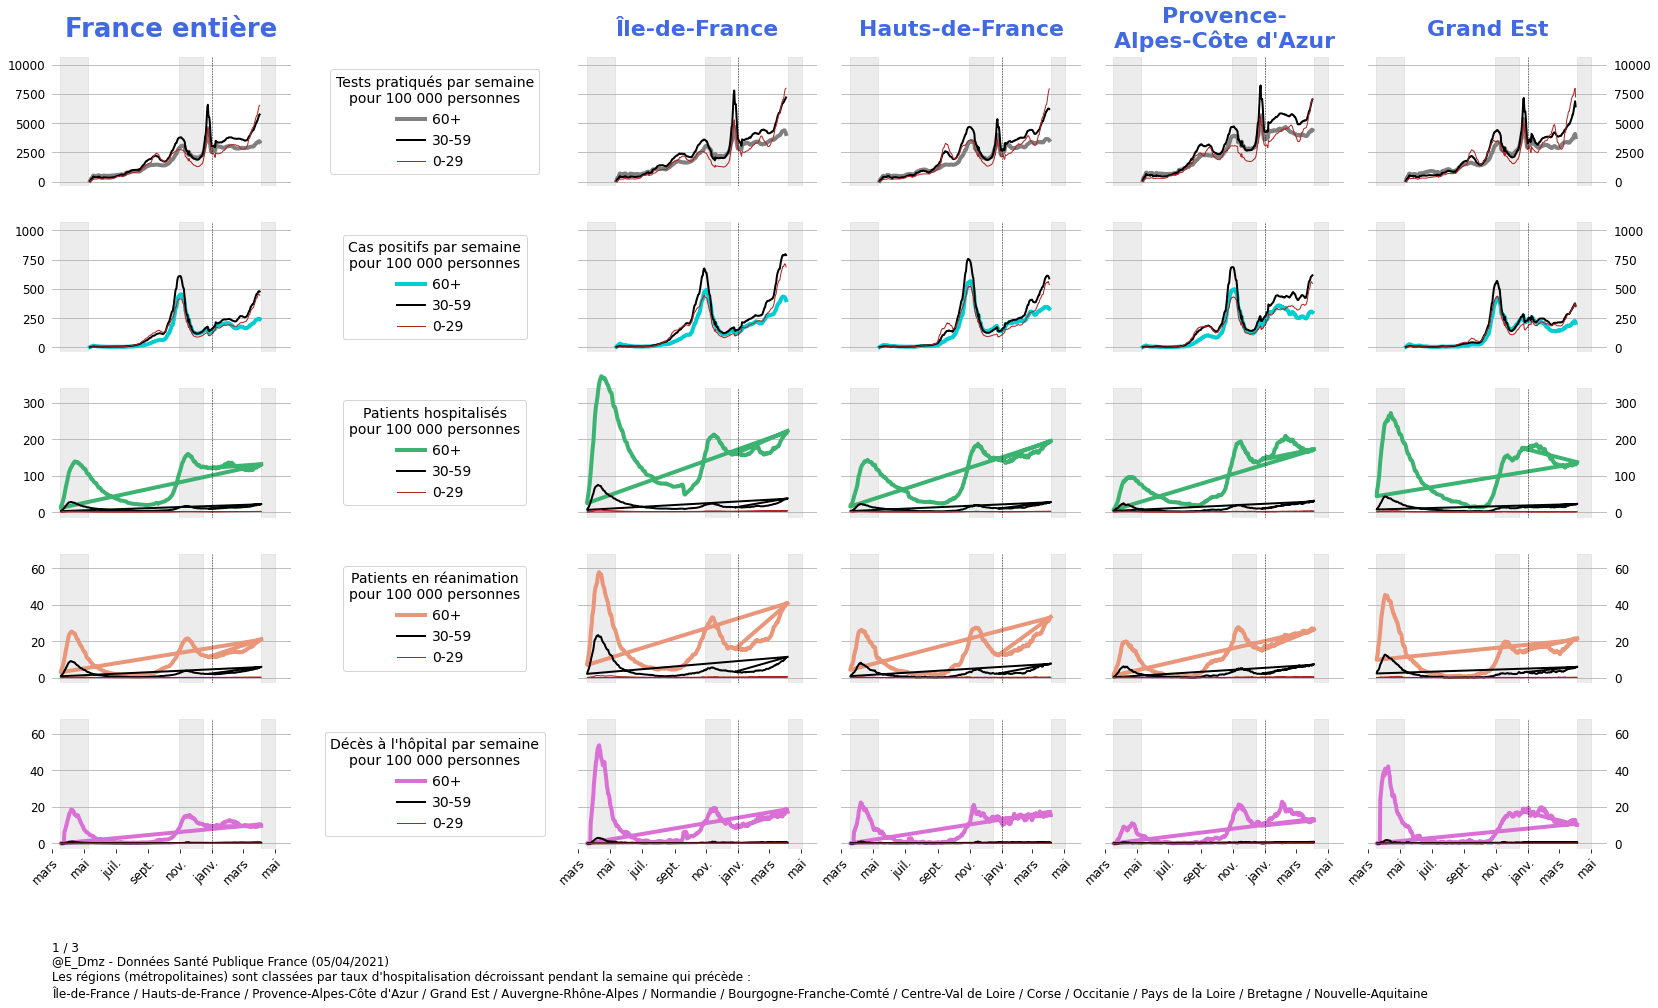

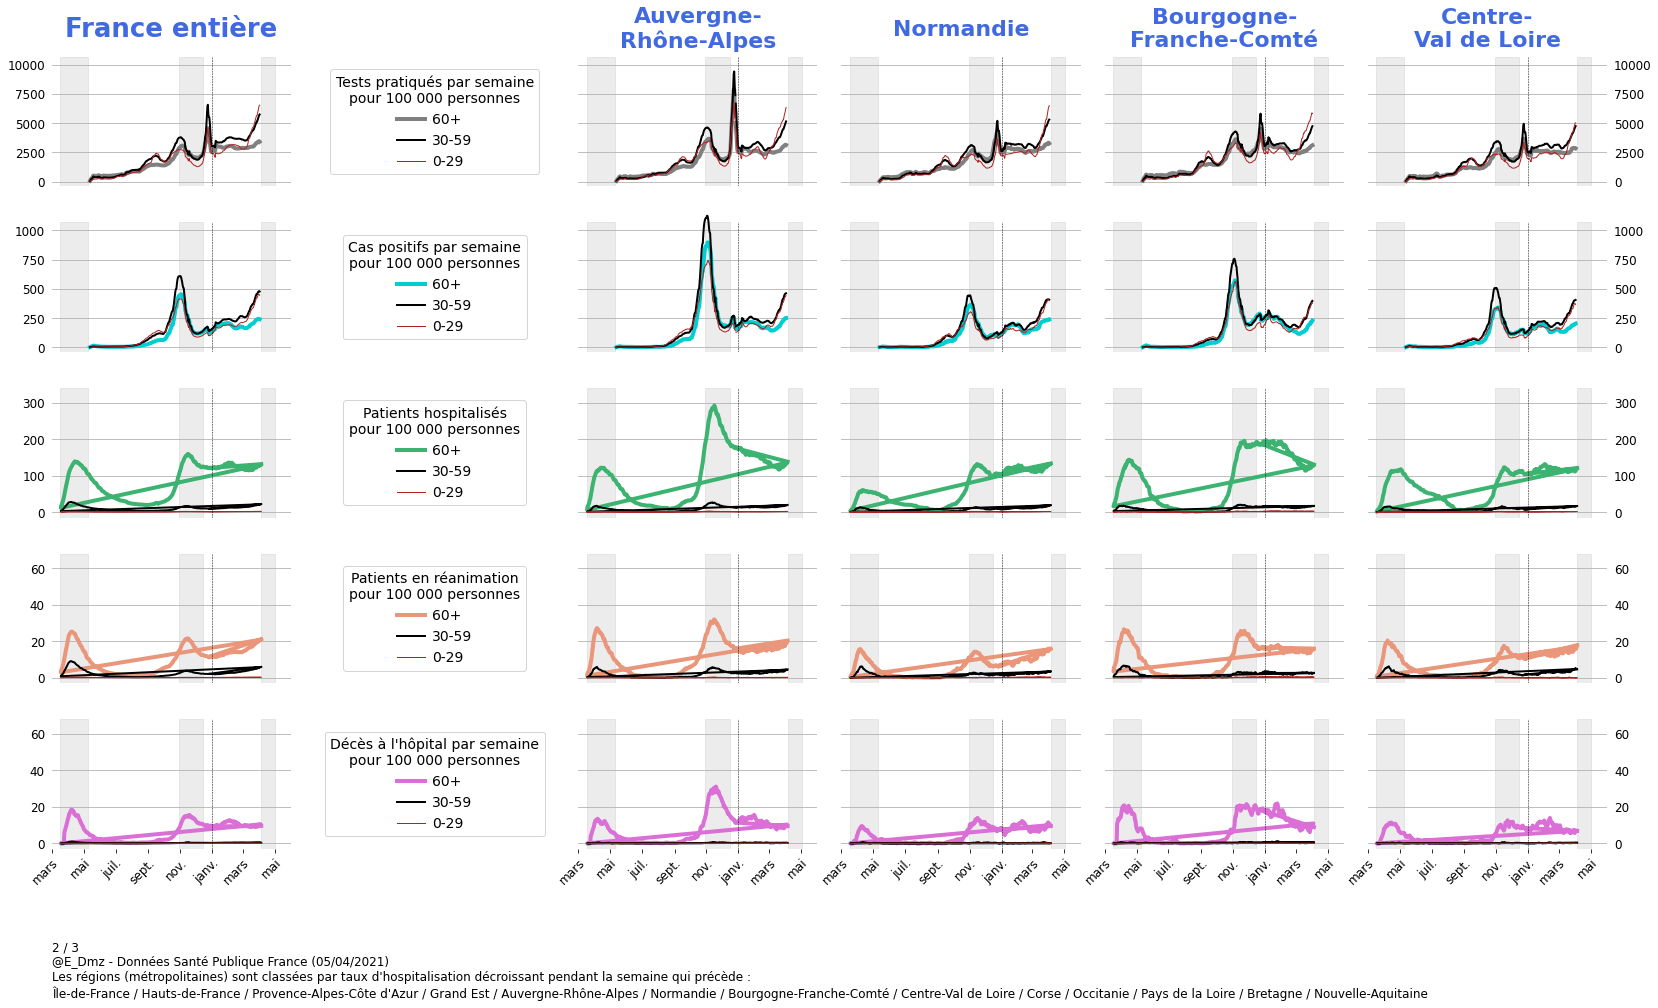

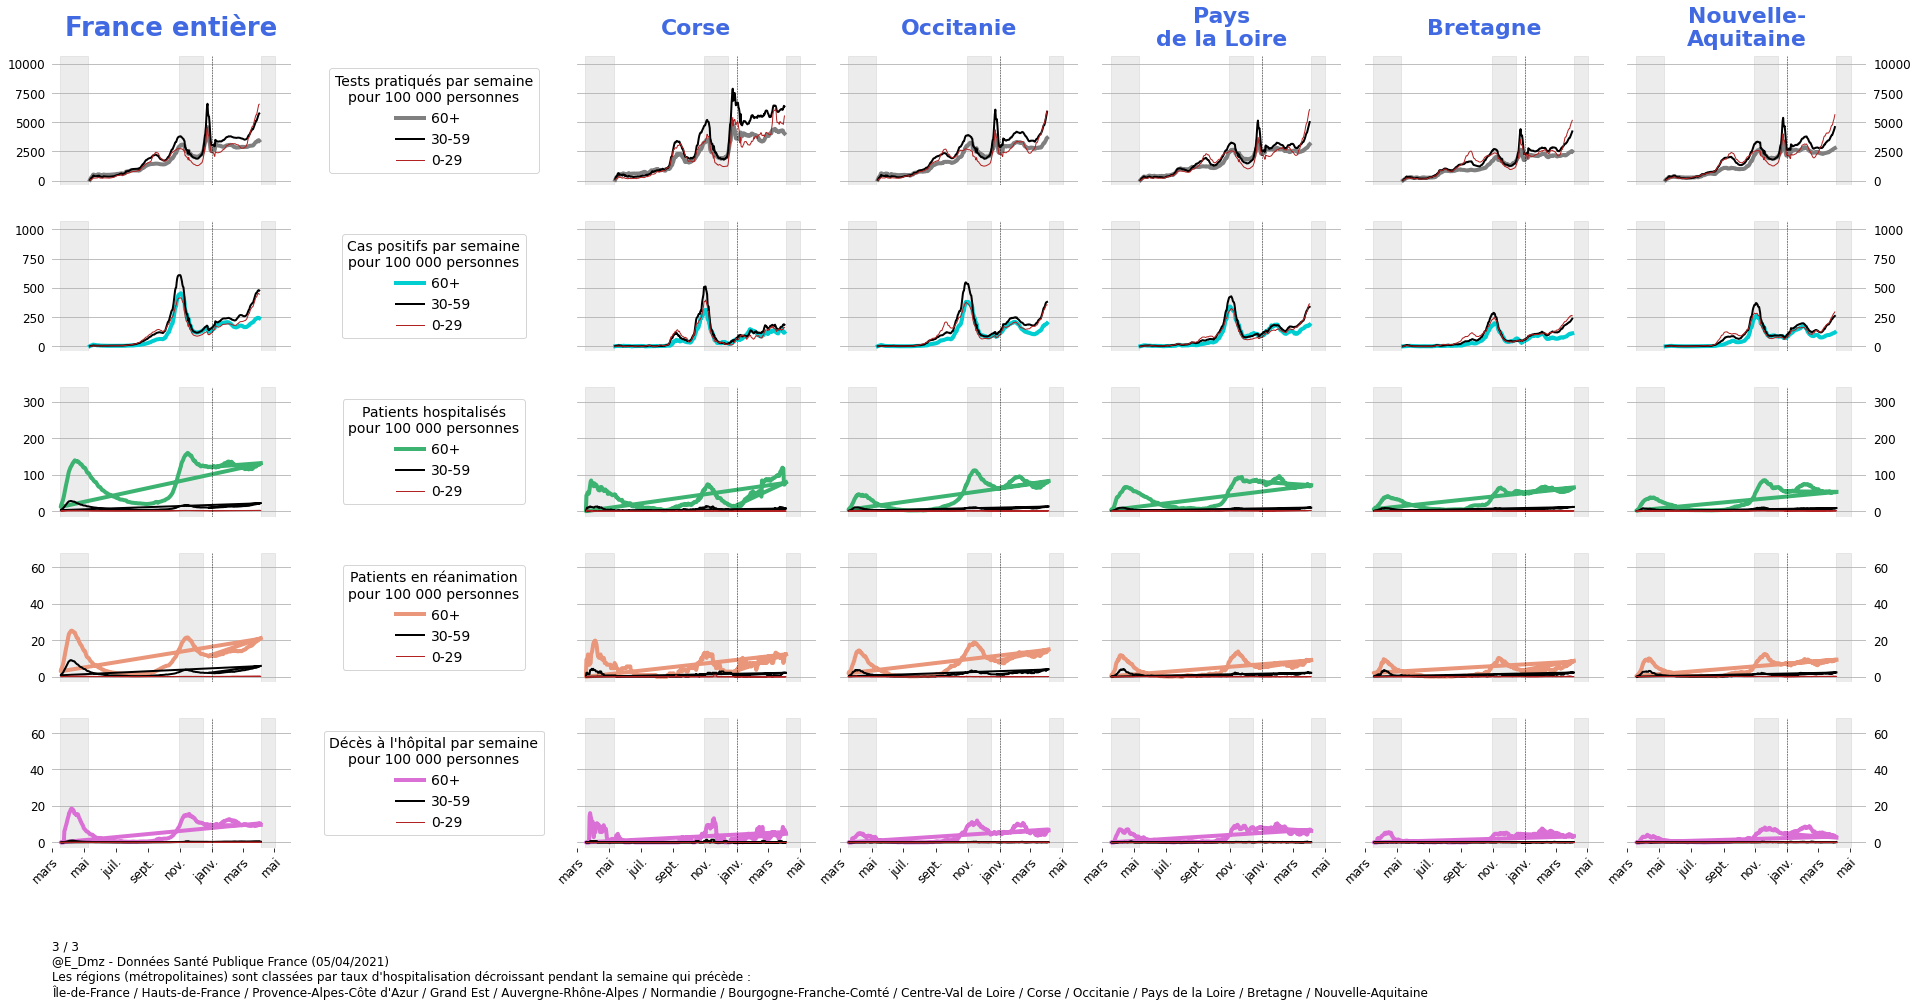

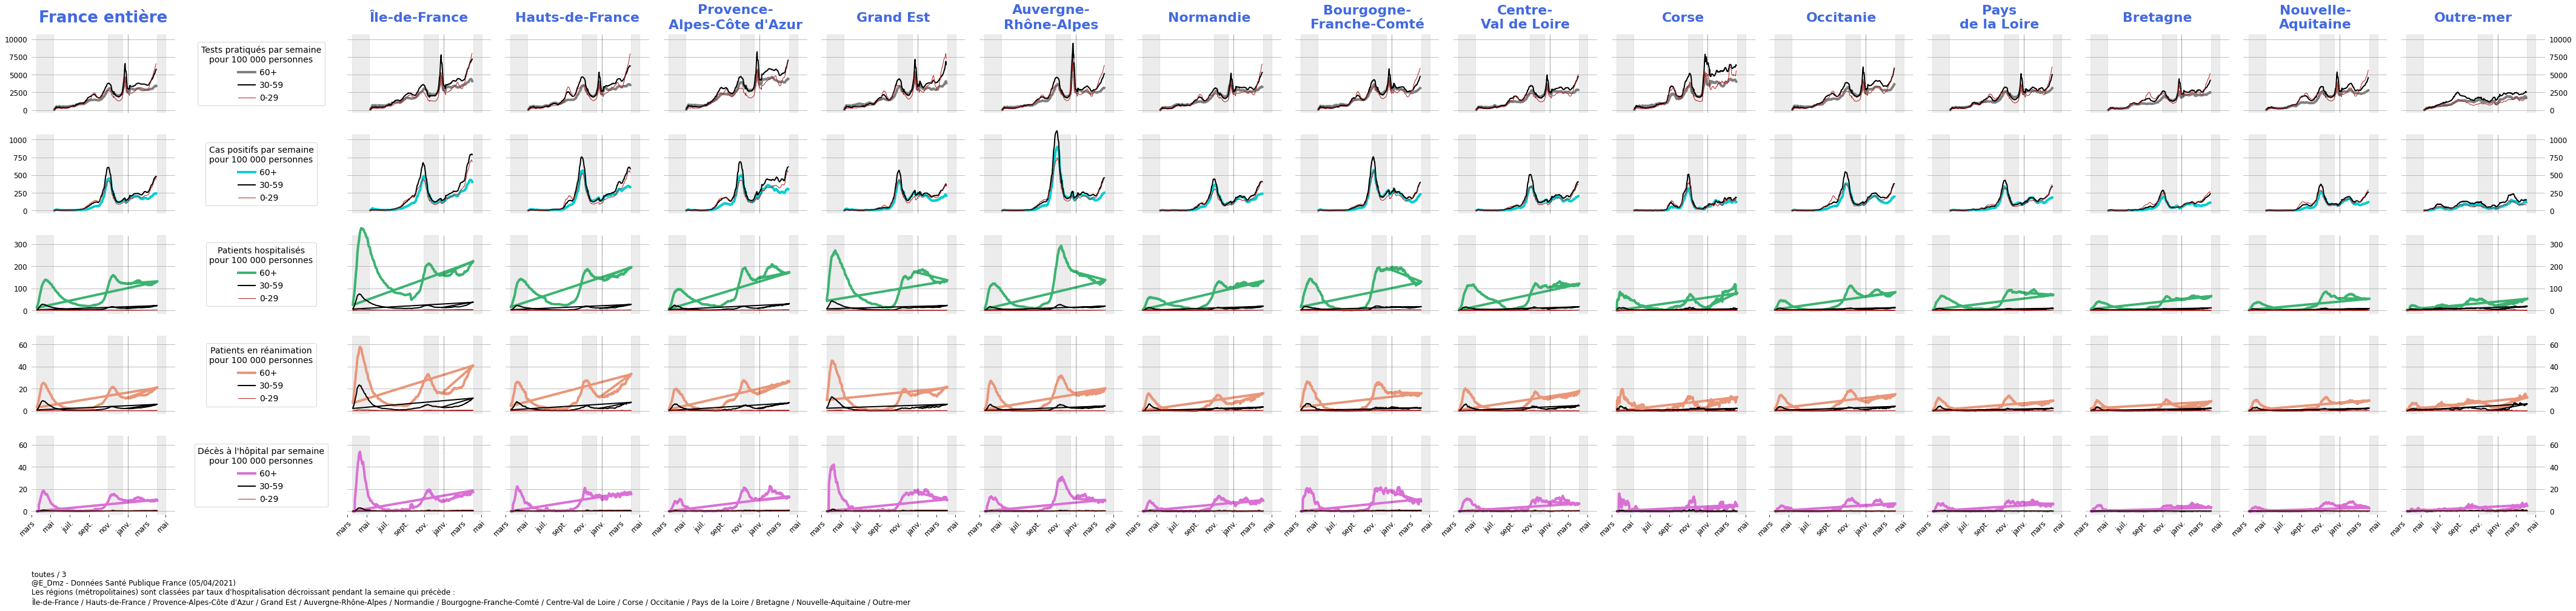

In [41]:
produce_fig_lines(d, regions_ordered[:4], regions_ordered[:-1], 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered[:-1], 2)
produce_fig_lines(d, regions_ordered[8:-1], regions_ordered[:-1], 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')

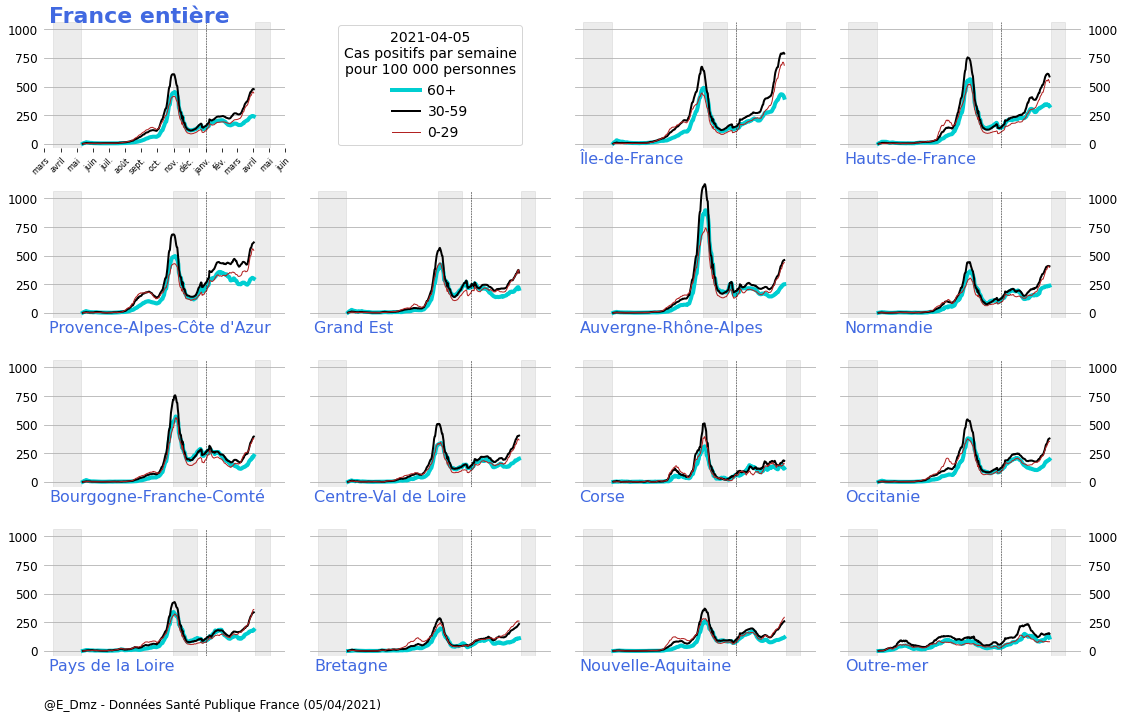

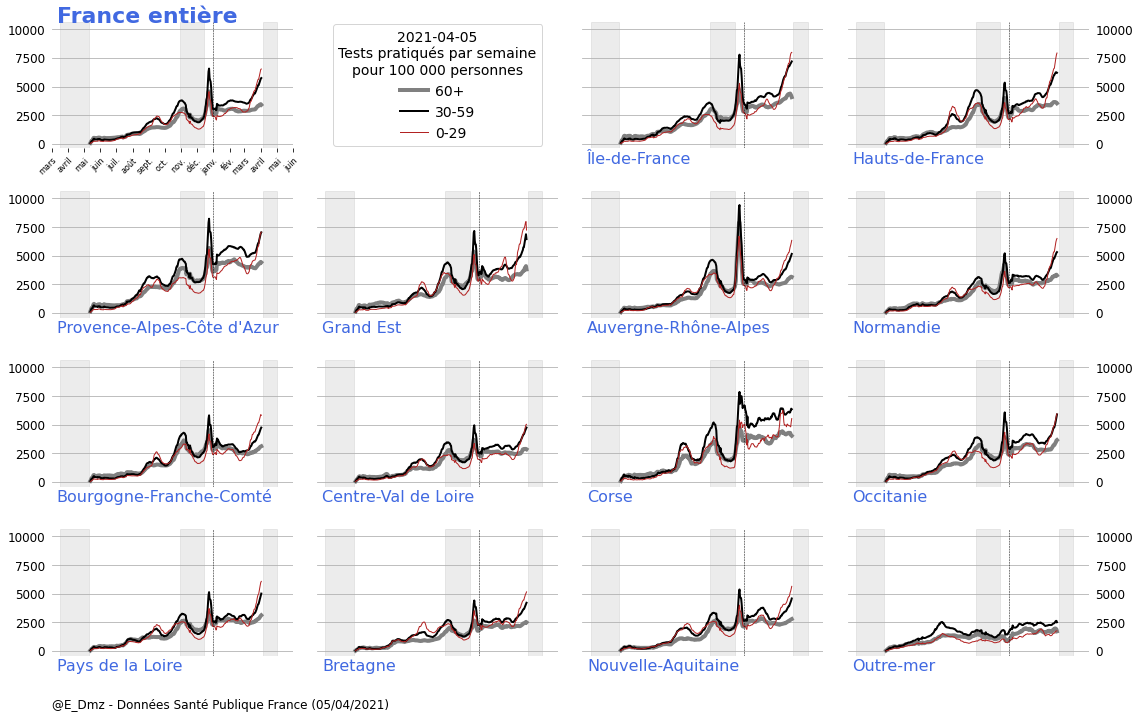

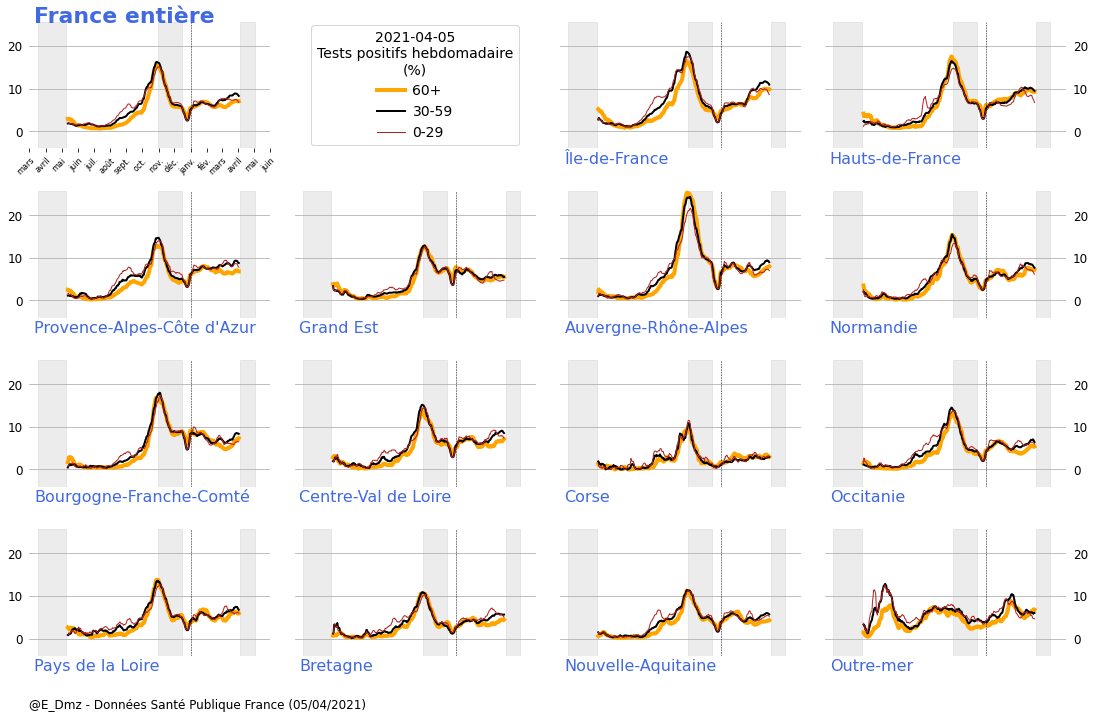

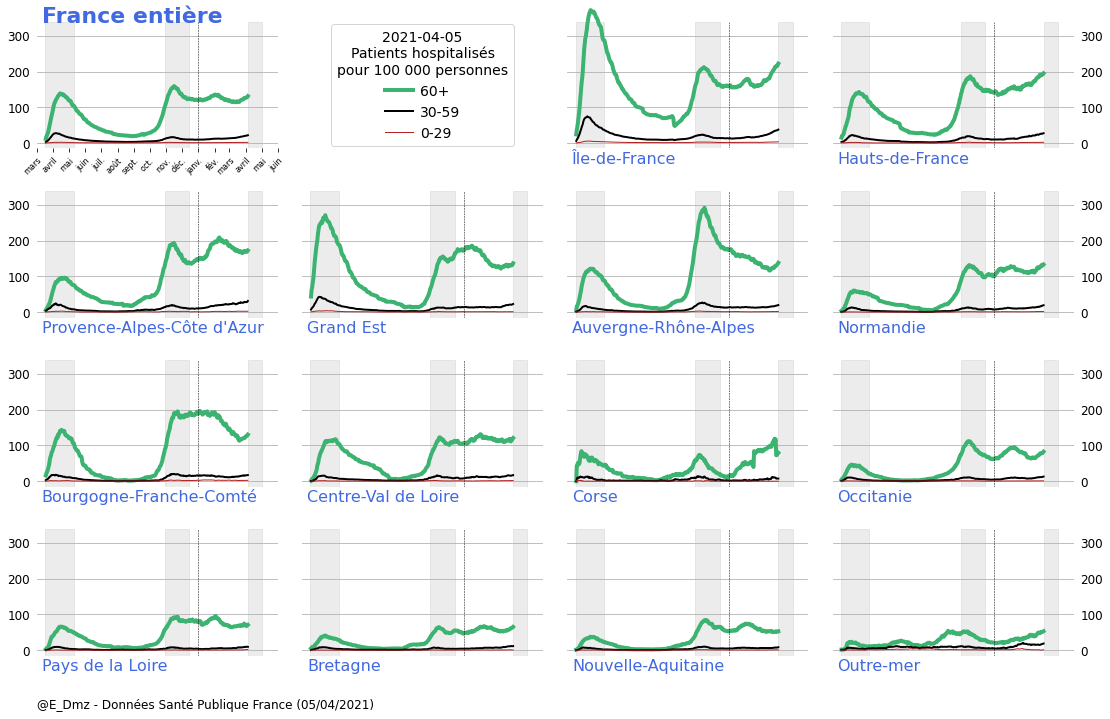

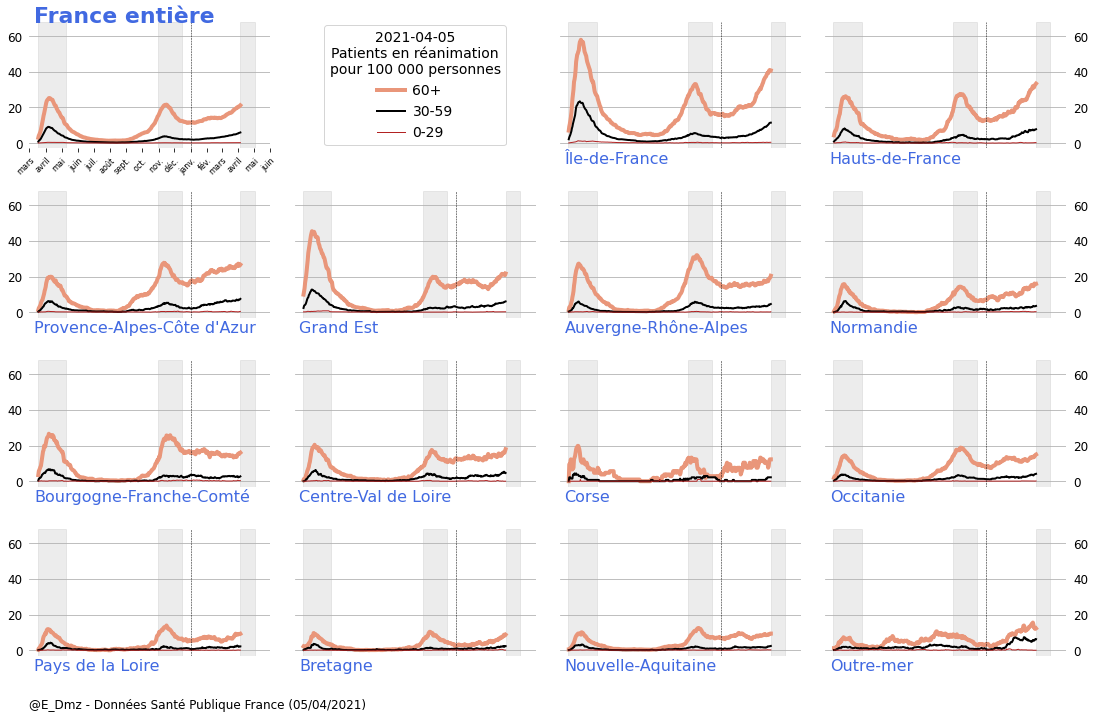

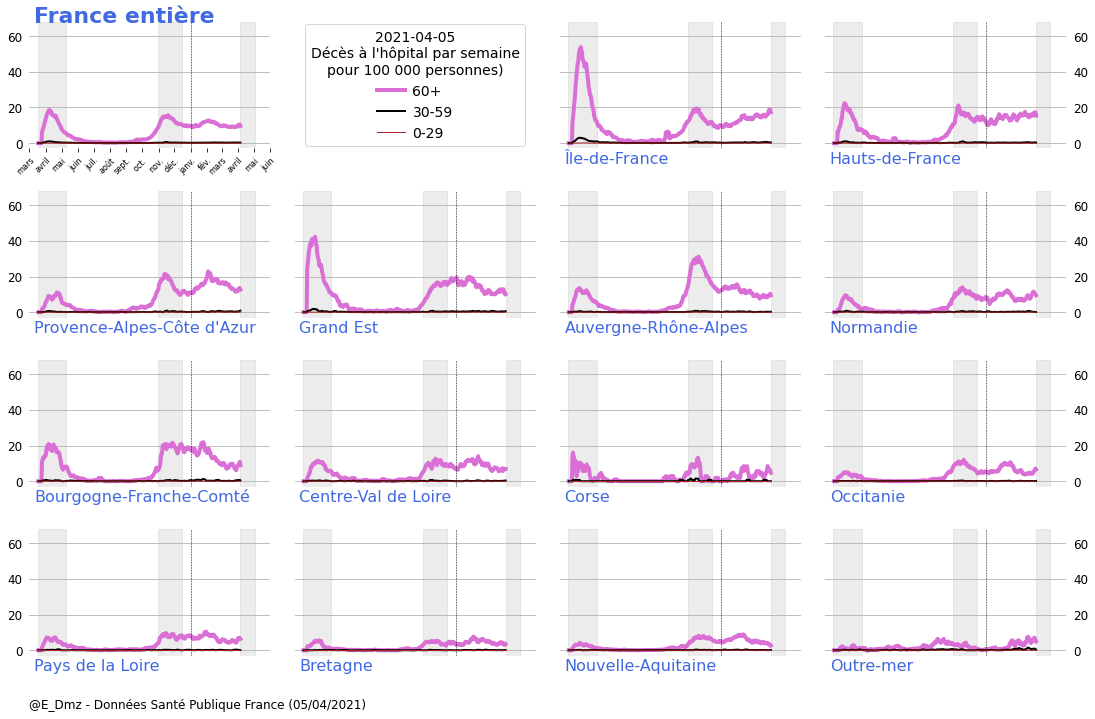

In [6]:
produce_fig(ymin = -40,
    ymax = 1190,
            d = d,
    column_to_plot = "incidence hebdo",
    main_color = "darkturquoise",
    title = '{}\nCas positifs par semaine\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-incidence.pdf',)
produce_fig(ymin = -400,
    ymax = 11900,
            d = d,
    column_to_plot = "taux de test hebdo",
    main_color = "gray",
    title = '{}\nTests pratiqués par semaine\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-tests.pdf',)
produce_fig(ymin = -4,
    ymax = 29,
            d = d,
    column_to_plot = "positivite hebdo",
    main_color = "orange",
    title = '{}\nTests positifs hebdomadaire\n(%)'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-positifs.pdf',)
produce_fig(ymin = -15,
    ymax = 379,
            d = d,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nPatients hospitalisés\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth + '-fig-hosp.pdf',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nPatients en réanimation\npour 100 000 personnes'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-rea.pdf',)
produce_fig(ymin = -3,
    ymax = 76,
            d = d,
    column_to_plot = "taux décès",
    main_color = "orchid",
    title = '{}\nDécès à l\'hôpital par semaine\npour 100 000 personnes)'.format(date),
    regions_ordered = regions_ordered,
    fname = fname_output_synth +  '-fig-deces.pdf',)